In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from surprise import accuracy
from surprise import SVD, KNNBasic, KNNWithMeans
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import PredefinedKFold, GridSearchCV, train_test_split, cross_validate

In [5]:
'''
http://files.grouplens.org/datasets/movielens/ml-100k-README.txt
'''

# Attributes in the data file are tab separated (\t).
# User = user_id
# Item = item_id
# Rating = rating
# Timestamp = timestamp
reader = Reader(line_format="user item rating timestamp", sep="\t", rating_scale=(1,5))

train_set = Dataset.load_from_file('./ml-100k/u1.base', reader=reader)
train_set = train_set.build_full_trainset()

In [6]:
# Load test set
folds_files = [("./ml-100k/u1.base", "./ml-100k/u1.test")]
data = Dataset.load_from_folds(folds_files, reader=reader)
pkf = PredefinedKFold()

test_set = None
for _, s in pkf.split(data):
    test_set = s

In [25]:
accuracies = {"rmse": [], "model": []}

In [26]:
knn_basic = KNNBasic(k=40, min_k=2, sim_options={'name': 'msd', 'user_based': True})
knn_basic.fit(train_set)
accuracies["rmse"].append(accuracy.rmse(knn_basic.test(test_set)))
accuracies["model"].append("knn_basic")

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9894


In [28]:
knn_means = KNNWithMeans(k=60, min_k=4, sim_options={'name': 'msd', 'user_based': True})
knn_means.fit(train_set)
accuracies["rmse"].append(accuracy.rmse(knn_means.test(test_set)))
accuracies["model"].append("knn_means")

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9649


In [29]:
svd = SVD(n_epochs=80, reg_all=0.1, n_factors=135, lr_all=0.005)
svd.fit(train_set)
accuracies["rmse"].append(accuracy.rmse(svd.test(test_set)))
accuracies["model"].append("svd")

RMSE: 0.9230


In [35]:
results = pd.DataFrame.from_dict(accuracies)

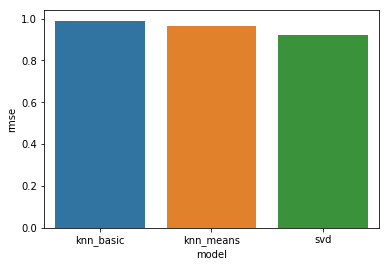

In [38]:
sns.barplot(x="model", y="rmse", data=results)

We can see that the SVD model has slightly less errors than the KNN models.